# Little Sister
*Mohamed et Orkaëlle*

La société "Little Sister" est une entreprise spécialisée dans le secteur de la vidéosurveillance. Pour leur prochain produit, elle souhaite développer un algorithme d'intelligence artificielle afin de détecter les différents éléments présents sur une image. Elle vous sollicite afin de l'aider à réaliser le système.

In [19]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
import fct_utiles as fct

## 0 - Initialisation

In [21]:
# Téléchargement et décompression des données
fct.ensure_data_loaded()

Datas already downloaded.
Datas are successfully loaded.



In [22]:
# Choix des thèmes
objets = ['butterfly','crocodile','rocket']
fct.copy_data(objets)

Echantillon copié dans dossier CURATED.


## 1 - Préparation des données

In [34]:
modelName = 'model001'

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [27]:
# Préparation des données
trainPath = './DATAS/CURATED/train/'
testPath = './DATAS/CURATED/test/'
IMAGE_SIZE    = (32, 32)
NUM_CLASSES   = len(objets)
BATCH_SIZE    = 64
NUM_EPOCHS    = 10

imageDataGenerator = tf.keras.preprocessing.image.ImageDataGenerator(validation_split=0.2)

train_generator = imageDataGenerator.flow_from_directory(
    directory=trainPath,
    target_size=IMAGE_SIZE,
    color_mode="rgb",
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset='training'
)

test_generator = imageDataGenerator.flow_from_directory(
    directory=testPath,
    target_size=IMAGE_SIZE,
    color_mode="rgb",
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset='validation'
)

Found 1200 images belonging to 3 classes.
Found 60 images belonging to 3 classes.


In [50]:
# Test #001
model = Sequential()

model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(250, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 28, 28, 32)        2432      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 10, 10, 64)        51264     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 1000)              1601000   
_________________________________________________________________
dropout_4 (Dropout)          (None, 1000)             

In [51]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

training = model.fit_generator(train_generator, epochs=NUM_EPOCHS, validation_data=test_generator)

Epoch 1/10
19/19 [==============================] - 2s 124ms/step - loss: 6.1546 - accuracy: 0.4200 - val_loss: 0.9758 - val_accuracy: 0.5167
Epoch 2/10
19/19 [==============================] - 2s 106ms/step - loss: 0.9987 - accuracy: 0.4983 - val_loss: 1.0137 - val_accuracy: 0.5167
Epoch 3/10
19/19 [==============================] - 2s 82ms/step - loss: 0.9564 - accuracy: 0.5742 - val_loss: 0.9176 - val_accuracy: 0.6333
Epoch 4/10
19/19 [==============================] - 2s 81ms/step - loss: 0.9043 - accuracy: 0.5992 - val_loss: 0.8507 - val_accuracy: 0.6667
Epoch 5/10
19/19 [==============================] - 2s 84ms/step - loss: 0.8500 - accuracy: 0.6142 - val_loss: 0.9922 - val_accuracy: 0.6667
Epoch 6/10
19/19 [==============================] - 2s 82ms/step - loss: 0.8077 - accuracy: 0.6325 - val_loss: 0.8535 - val_accuracy: 0.6833
Epoch 7/10
19/19 [==============================] - 2s 82ms/step - loss: 0.7418 - accuracy: 0.6617 - val_loss: 0.8351 - val_accuracy: 0.6167
Epoch 8/10


In [52]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

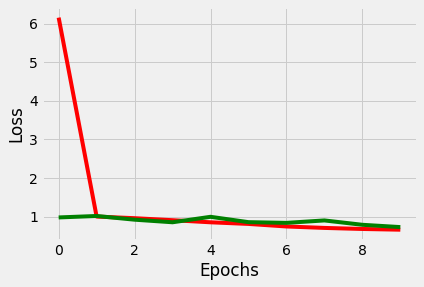

In [53]:
plt.plot(training.history['loss'], color='red', label='Training loss')
plt.plot(training.history['val_loss'],  color='green', label='Validation loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

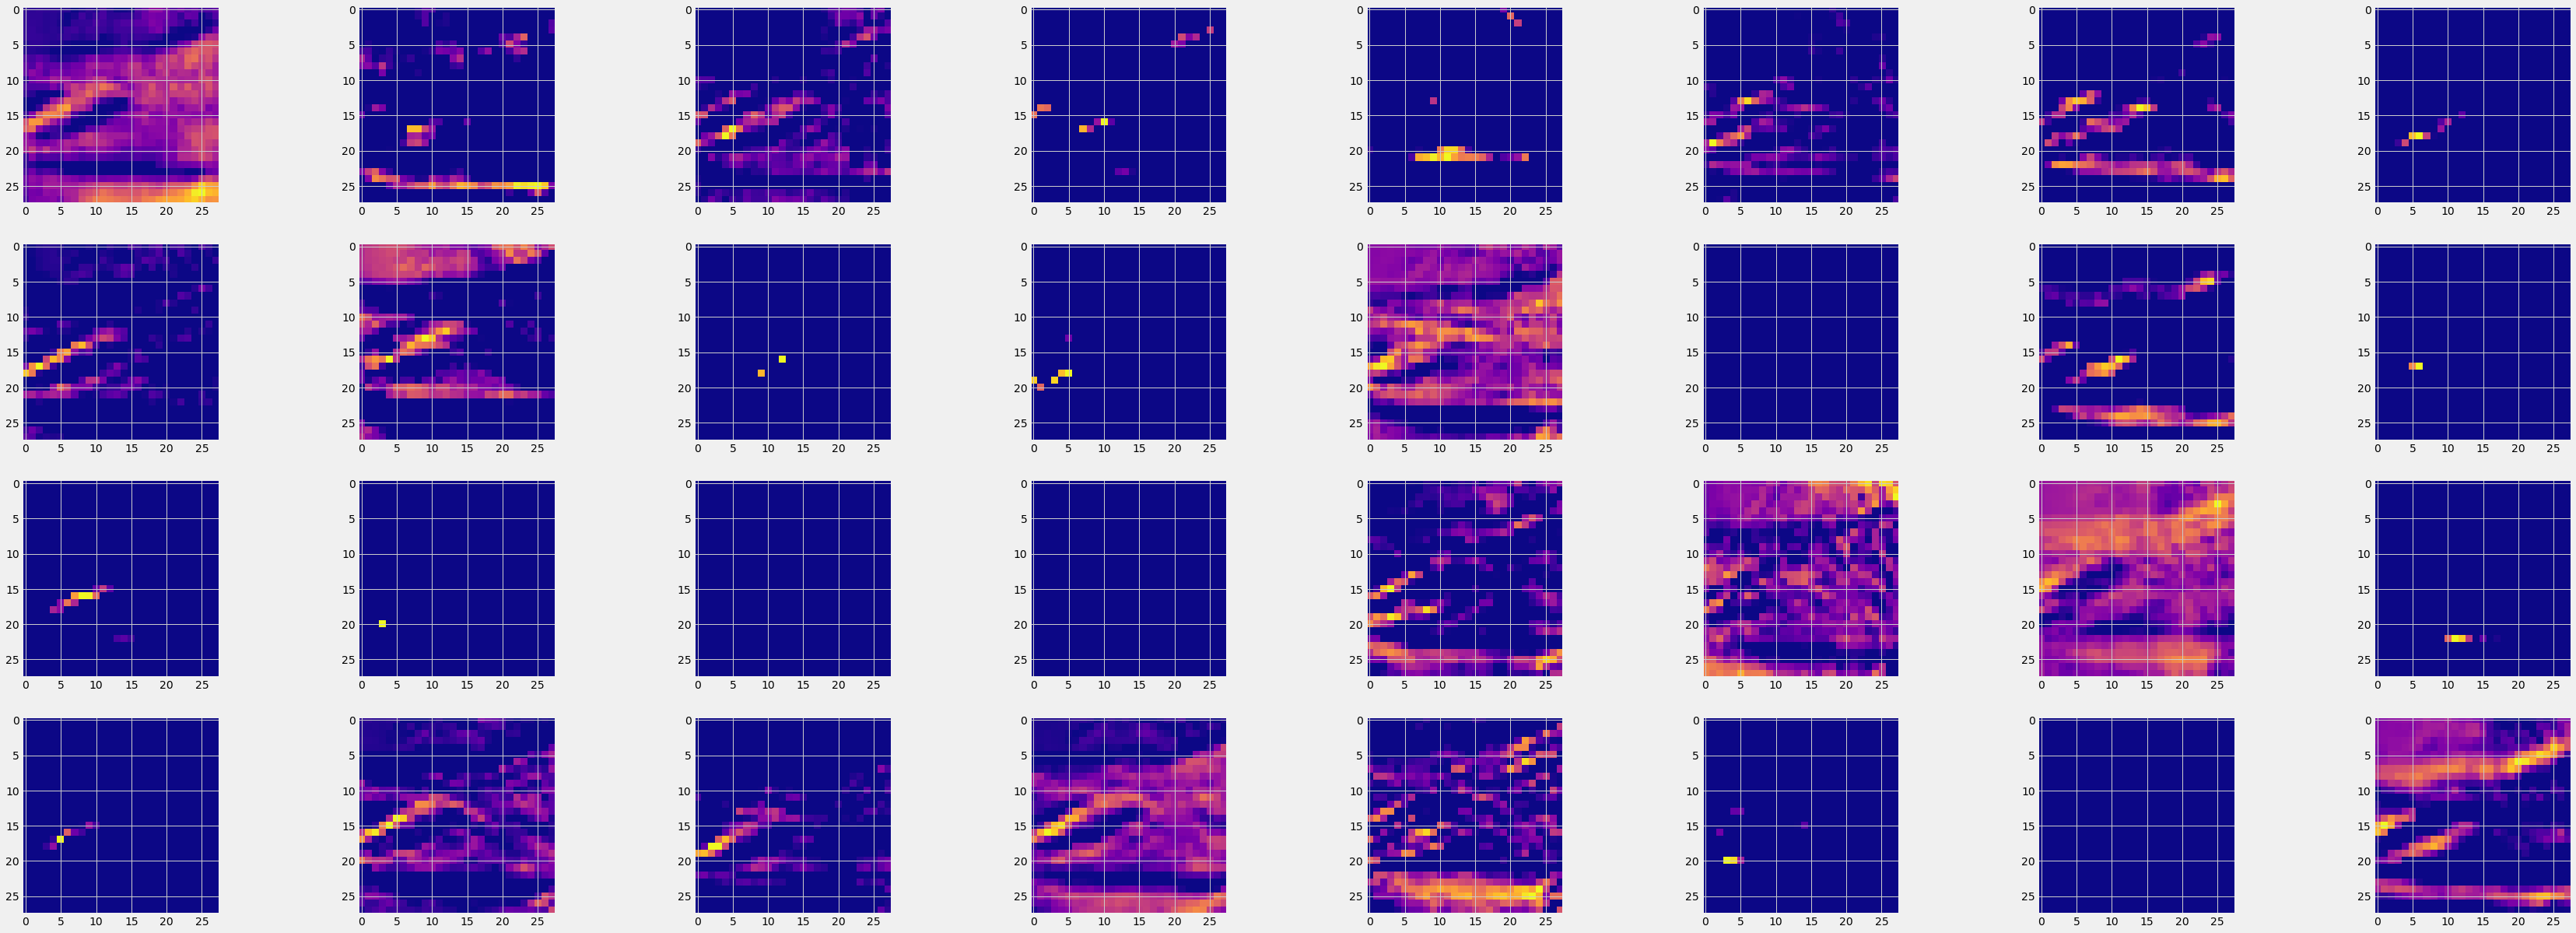

In [54]:
from keras.models import Model
from keras.preprocessing import image
import numpy as np

layer_outputs = [layer.output for layer in model.layers]

test_image = "./DATAS/CURATED/test/crocodile/0097.png"

# Le chargement de l'image doit être augmenté puisque notre model prend des lots d'images.
img = image.load_img(test_image, target_size=(32,32, 3))
img_arr = image.img_to_array(img)
img_arr = np.expand_dims(img_arr, axis=0)

activation_model = Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(img_arr)

def display_activation(activations, col_size, row_size, act_index): 
    activation = activations[act_index]
    activation_index=0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*13.5,col_size*2.5))
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index], cmap='plasma')
            activation_index += 1

display_activation(activations, 8, 4, 0)